In [2]:
df =  pd.read_csv("/kaggle/input/heartdiseasedata/heart_v2.csv")

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [8]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [9]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [12]:
df['heart disease'].value_counts()

heart disease
0    150
1    120
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


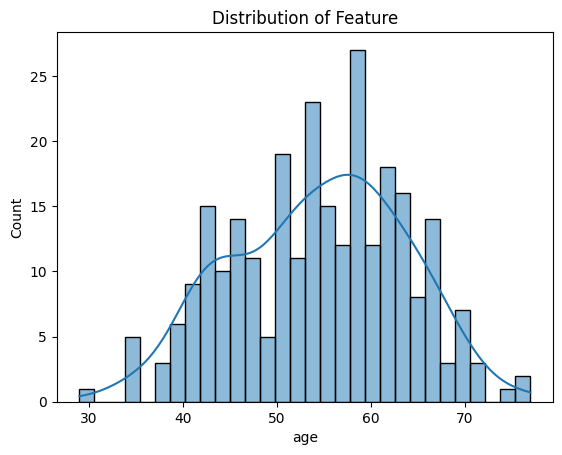

In [15]:
# Histogram
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Distribution of Feature")
plt.show()

In [18]:
#features selection

X = df.drop('heart disease', axis = 1)

y = df['heart disease']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [20]:
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
y_train = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.66      0.71      0.69        49
           1       0.50      0.44      0.47        32

    accuracy                           0.60        81
   macro avg       0.58      0.58      0.58        81
weighted avg       0.60      0.60      0.60        81



In [36]:
print(accuracy_score(y_test,y_pred))

0.6049382716049383


In [37]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[35 14]
 [18 14]]


<Axes: >

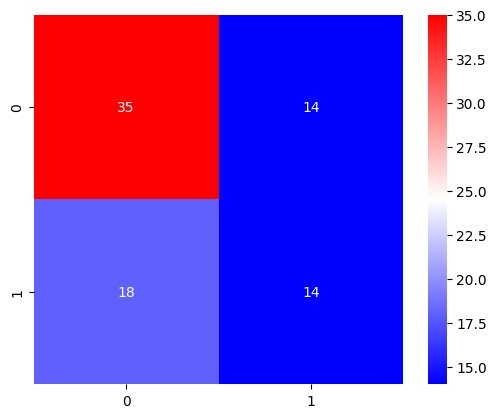

In [40]:
sns.heatmap(matrix, square=True, annot=True, cmap='bwr')